# BS: Subscriptions

Let's start by importing the necessary libraries and by defining the desired functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Function that simulates the unsubscribe-decisions of a single user, returning the period of unsubscription
# p is the probability of unsubscribing at any period and T is the number of periods
def single_user(p,T):
    for i in range(T):
        if(np.random.rand()<p):
            return i
    return T

# Function that simulates the unsubscribe-decisions of N users, returning an array with the occurencies of all the possible outcomes
# p is the probability of unsubscribing at any period, T is the number of periods and N is the number of users
def users_simulator(p,T,N):
    results=np.zeros(T+1)
    for i in range(N):
        results[single_user(p,T)]+=1
    return results

# Function that estimate the value for the parameter p which is most likely to lead to a measurement such as x, given T and N
def parameter_estimator(x,T,N):
    z=0
    for i in range(T+1):
        z+=i*x[i]
    return (N-x[T])/(N-x[T]+z)


Let's test the simulator and estimator functions

In [2]:
T=20
N=10000
p=0.5
x=users_simulator(p,T,N)
p_2=parameter_estimator(x,T,N)
print("The difference between the original parameter and the estimated one is", abs(p_2-p))

The difference between the original parameter and the estimated one is 0.002992807202856995


It's now time to check how the estimation function behaves with respect to the given dataset

The estimated value for p is 0.07495642068564788


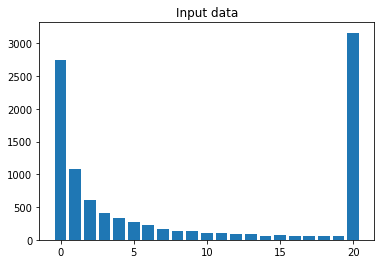

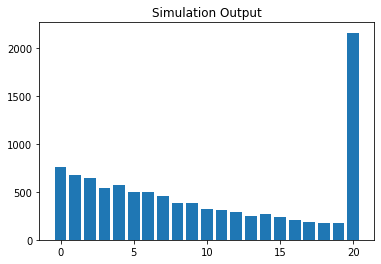

In [4]:
# Let's read the data from the csv file
df=pd.read_csv("data_subscriptions.csv")
df.sort_values(by=["renewals"],inplace=True)

# Now we can take the array of results, the number of users and the timelength
data=df['N'].to_numpy()
N=data.sum()
T=data.size-1

# We can use the previous functions in order to get the optimal value for p
possible_p = parameter_estimator(data,T,N)
print("The estimated value for p is", possible_p)

# We can use this value to run simulations with same p, T and N to see if the results match the input data
experiment=users_simulator(possible_p,T,N)

plt.bar(np.arange(len(data)),data)
plt.title('Input data')
plt.show()

plt.bar(np.arange(len(experiment)),experiment)
plt.title('Simulation Output')
plt.show()

One can clearly see that the number of unsubscriptions in the simulation decreases linearly with time, whereas in the given input data, this is not the case (in particular the behaviour resembles an exponential profile). This probably means that the assumption that the number of unsubscriptions can be described via the previous distribution is wrong, because even by choosing the best value for p, the results are quite different from what we should expect. 